# Analysis of a video

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from image_analysis_21_10_2021 import Image_analysis

In [3]:
vid = Image_analysis()
vid.read_video(name="noB_B", um_per_p=1, path="noB-B-3001.wmv")

True <class 'numpy.ndarray'>


In [4]:
vid.images["noB_B1"]["width"]

1600

In [5]:
default_parameters = vid.get_default_parameters()
default_parameters

{'dir_path': 'data/microscope_cf_images_27_09_2021/27_09_2021_m2',
 'um_per_p': 1.075,
 'color_threshold': None,
 'actual_min': 1,
 'target_min': 0.1,
 'actual_max': 98,
 'target_max': 99.9,
 'min_height': 900,
 'max_height': 1000,
 'min_width': 750,
 'max_width': 1750,
 'show_threshold': True,
 'div_ratio': 7,
 'tol_cluster': 2,
 'av_thick': 10,
 'particle_permeance': 9.3052e-10,
 'oil_permeance': 9.3052e-13,
 'functions_set': ['crop', 'convert_grey', 'reverse_color', 'color_threshold']}

In [6]:
default_parameters["color_threshold"] = 150
default_parameters["actual_max"] = 798
default_parameters["target_max"] = 779.9
default_parameters["min_height"] = 235
default_parameters["max_height"] = 1035
default_parameters["min_width"] = 0
default_parameters["max_width"] = 1600
default_parameters["div_ratio"] = 1

In [7]:
vid.set_default_parameters(default_parameters=default_parameters)

In [8]:
vid.apply_to_all_im()

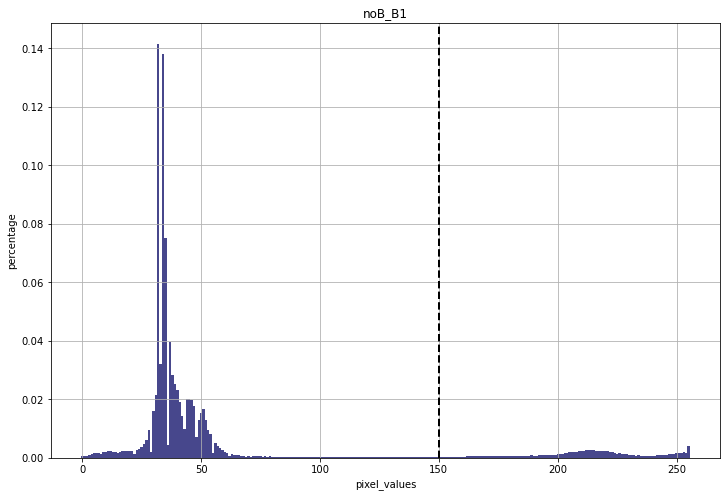

In [9]:
vid.show_histogram(name="noB_B1")

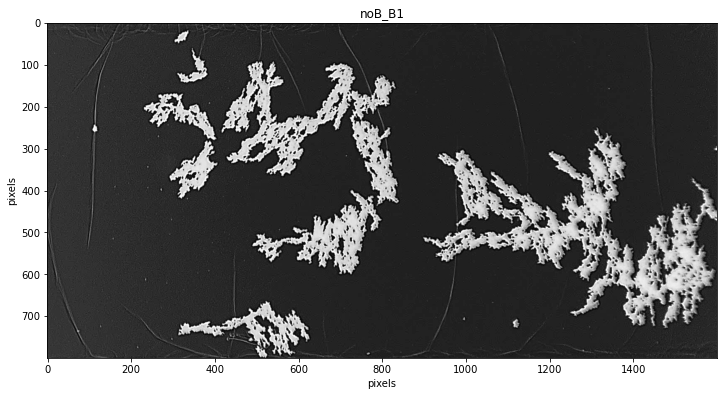

In [10]:
# vid.show_t_i_with_i(name="noB_B1")
vid.show_image(name="noB_B1")

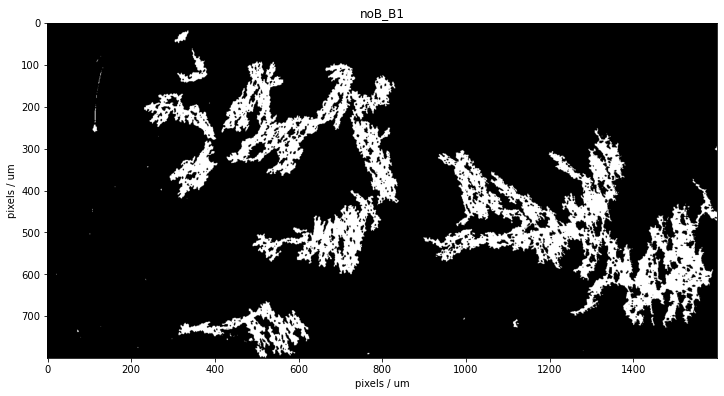

In [11]:
vid.show_threshold_image(name="noB_B1")
# vid.cluster_identification(name="noB_B1")
# vid.show_clusters(name="noB_B1")

In [16]:
%matplotlib qt

In [ ]:
vid.show_clusters(name="noB_B1", cluster_name="c5")

In [12]:
print("number of frames : ", len(vid.images))

number of frames :  58


#### The first image is all black

In [13]:
del vid.images["noB_B0"]

In [14]:
print("number of frames : ", len(vid.images))

number of frames :  57


In [15]:
vid.apply_to_all_im(functions_set=["outline_clusters_cv2"])

In [16]:
perm1 = vid.femm2d(clusters_parameters={"outlines": vid.images['noB_B1']["outlines"]}, w=1600, e=799, return_B=False, close=False)

In [38]:
print("magnetic permeance 1 : ", perm1)

magnetic permeance 1 :  6.65370907906974e-11


#### Calculation of the magnetic properties with FEMM 2D

In [39]:
#perm1, im1 = vid.femm2d(clusters_parameters={"outlines": vid.images['noB_B1']["outlines"]}, w=1600, e=799, close=True)
#perm8, im8 = vid.femm2d(clusters_parameters={"outlines": vid.images['noB_B8']["outlines"]}, w=1600, e=799, close=True)
#perm15, im15 = vid.femm2d(clusters_parameters={"outlines": vid.images['noB_B15']["outlines"]}, w=1600, e=799, close=True)
#perm22, im22 = vid.femm2d(clusters_parameters={"outlines": vid.images['noB_B22']["outlines"]}, w=1600, e=799, close=True)
#perm29, im29 = vid.femm2d(clusters_parameters={"outlines": vid.images['noB_B29']["outlines"]}, w=1600, e=799, close=True)
#perm36, im36 = vid.femm2d(clusters_parameters={"outlines": vid.images['noB_B36']["outlines"]}, w=1600, e=799, close=True)

In [40]:
list_perm = []
list_im = []
for i in range(24):
    numb = i*2 + 1
    perm, im = vid.femm2d(clusters_parameters={"outlines": vid.images["noB_B" + str(numb)]["outlines"]}, w=1600, e=799, close=True)
    list_perm.append(perm)
    list_im.append(im)

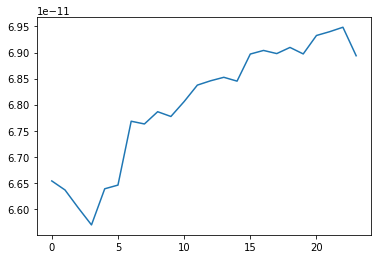

In [43]:
plt.plot(list_perm)

In [61]:
max_B = [np.amax(list_im[i]) for i in range(24)]
max_max = np.amax(max_B)
print(max_max)

0.03614611417698414


In [93]:
list_mod_im = []
for i in range(24):
    data = np.copy(list_im[i])
    data = data / 0.036147
    data = data.flatten()
    data = np.array(list(map(f, data)))
    data = data.reshape(list_im[i].shape)
    list_mod_im.append(data)

In [46]:
%matplotlib qt

In [134]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig, axes = plt.subplots(1, 2, figsize=[26, 11], gridspec_kw={'width_ratios': [5, 1]})
# plt.tight_layout()

axes[0].imshow(list_mod_im[0], vmin=0, vmax=0.0362)
axes[0].set_xlabel("width [um]")
axes[0].set_ylabel("height [um]")
axes[1].plot(np.linspace(0, 3066, 24), list_perm, '-', color="midnightblue")
axes[1].set_xlabel("Time [ms]")
axes[1].set_ylabel("Magnetic permeance [T * m**2 / A]")

# initialization function: plot the background of each frame
def init():
    axes[0].clear()
    axes[0].imshow(list_mod_im[0], vmin=0, vmax=0.0362)
    axes[0].set_xlabel("width [um]")
    axes[0].set_ylabel("height [um]")
    axes[1].clear()
    axes[1].plot(np.linspace(0, 3066, 24), list_perm, '-', color="midnightblue", alpha=0.5)
    axes[1].plot(list_perm[0], '-o', color="midnightblue")
    axes[1].set_xlabel("Time [ms]")
    axes[1].set_ylabel("Magnetic permeance [T * m**2 / A]")
    # plot.set_data(list_im[0])
    return axes[0], axes[1],

# animation function.  This is called sequentially
def animate(i):
    axes[0].clear()
    axes[0].imshow(list_mod_im[i], vmin=0, vmax=0.0362)
    axes[0].set_xlabel("width [um]")
    axes[0].set_ylabel("height [um]")
    axes[1].clear()
    axes[1].plot(np.linspace(0, 3066, 24), list_perm, '-', color="midnightblue", alpha=0.5)
    axes[1].plot(np.linspace(0, 133*i, i+1), list_perm[:i+1], '-o', color="midnightblue")
    axes[1].set_xlabel("Time [ms]")
    axes[1].set_ylabel("Magnetic permeance [T * m**2 / A]")
    # plot.set_data(list_im[i])
    return axes[0], axes[1],

# The animation function
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=24, interval=333, blit=True)

#plt.title("Evolution of the permeance in time")

plt.show()

#### Evolution of the permeance with the time

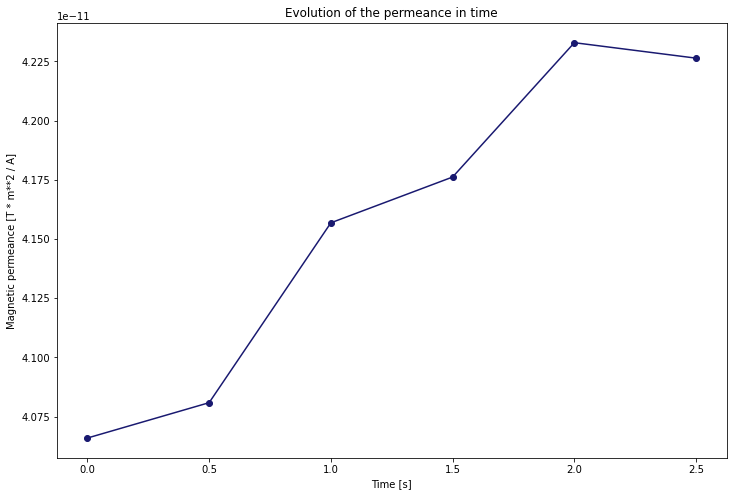

In [84]:
fig, ax0 = plt.subplots(1, 1, figsize=[12, 8])
ax0.plot([0.0, 0.5, 1.0, 1.5, 2.0, 2.5], [perm1, perm8, perm15, perm22, perm29, perm36], 'o-', color="midnightblue")
ax0.set_xlabel("Time [s]")
ax0.set_ylabel("Magnetic permeance [T * m**2 / A]")
plt.title("Evolution of the permeance in time")
plt.show()

#### Vizualization of the magnetic field frame by frame

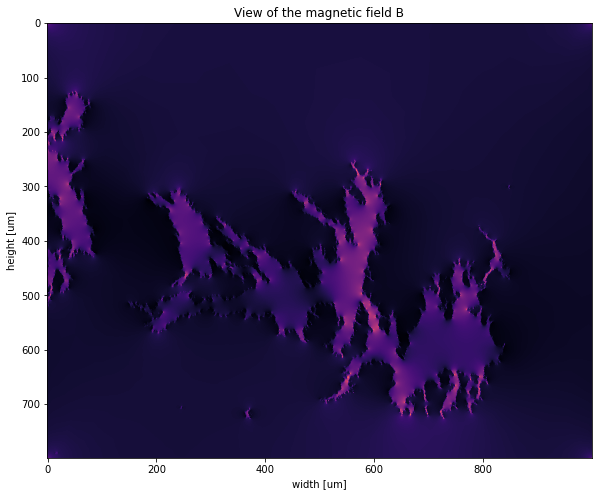

In [78]:
data = im1.copy()
data = data.flatten()
data = data / np.amax(data)
data = np.array(list(map(f, data)))
data = data.reshape(im1.shape)

fig, ax0 = plt.subplots(1, 1, figsize=[12, 8])
ax0.imshow(data, cmap='magma')
ax0.set_xlabel("width [um]")
ax0.set_ylabel("height [um]")
plt.title("View of the magnetic field B")
plt.show()

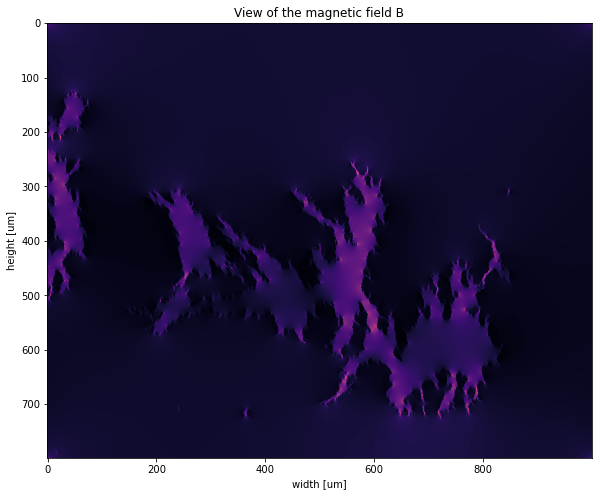

In [79]:
data = im8.copy()
data = data.flatten()
data = data / np.amax(data)
data = np.array(list(map(f, data)))
data = data.reshape(im1.shape)

fig, ax0 = plt.subplots(1, 1, figsize=[12, 8])
ax0.imshow(data, cmap='magma')
ax0.set_xlabel("width [um]")
ax0.set_ylabel("height [um]")
plt.title("View of the magnetic field B")
plt.show()

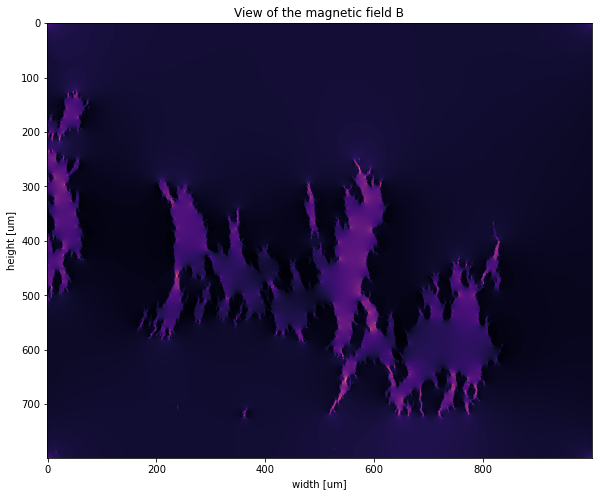

In [80]:
data = im15.copy()
data = data.flatten()
data = data / np.amax(data)
data = np.array(list(map(f, data)))
data = data.reshape(im1.shape)

fig, ax0 = plt.subplots(1, 1, figsize=[12, 8])
ax0.imshow(data, cmap='magma')
ax0.set_xlabel("width [um]")
ax0.set_ylabel("height [um]")
plt.title("View of the magnetic field B")
plt.show()

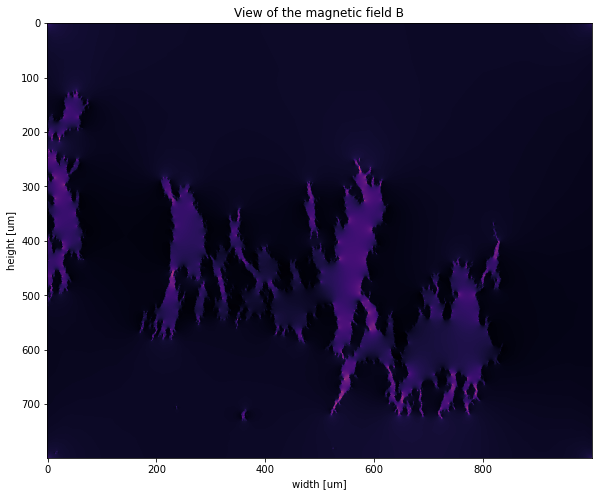

In [81]:
data = im22.copy()
data = data.flatten()
data = data / np.amax(data)
data = np.array(list(map(f, data)))
data = data.reshape(im1.shape)

fig, ax0 = plt.subplots(1, 1, figsize=[12, 8])
ax0.imshow(data, cmap='magma')
ax0.set_xlabel("width [um]")
ax0.set_ylabel("height [um]")
plt.title("View of the magnetic field B")
plt.show()

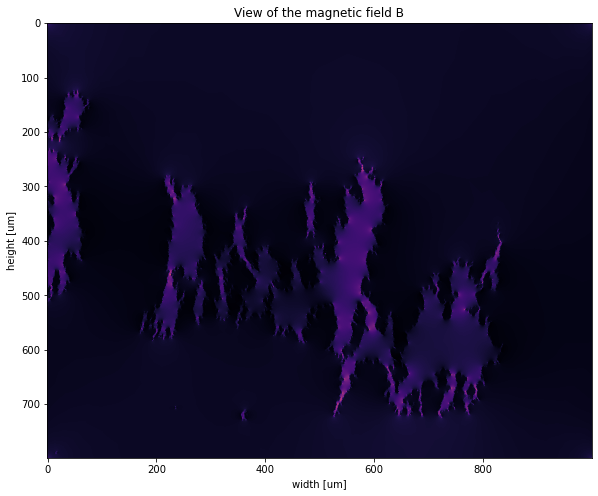

In [82]:
data = im29.copy()
data = data.flatten()
data = data / np.amax(data)
data = np.array(list(map(f, data)))
data = data.reshape(im1.shape)

fig, ax0 = plt.subplots(1, 1, figsize=[12, 8])
ax0.imshow(data, cmap='magma')
ax0.set_xlabel("width [um]")
ax0.set_ylabel("height [um]")
plt.title("View of the magnetic field B")
plt.show()

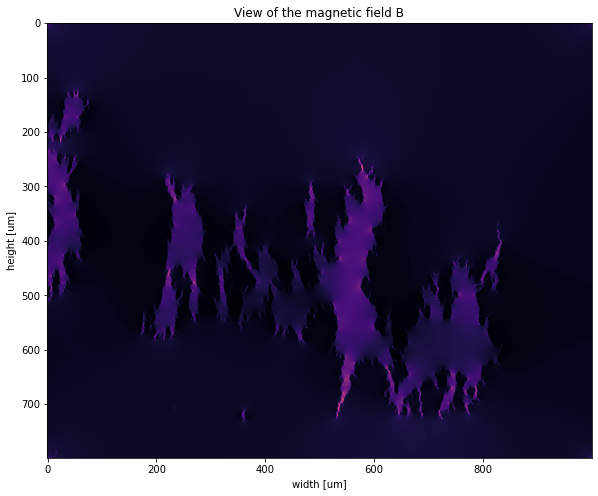

In [83]:
data = im36.copy()
data = data.flatten()
data = data / np.amax(data)
data = np.array(list(map(f, data)))
data = data.reshape(im1.shape)

fig, ax0 = plt.subplots(1, 1, figsize=[12, 8])
ax0.imshow(data, cmap='magma')
ax0.set_xlabel("width [um]")
ax0.set_ylabel("height [um]")
plt.title("View of the magnetic field B")
plt.show()

In [6]:
def f(x):
    a = 1
    return (1-math.exp(-a*x))/(1-math.exp(-a))

#### Add the permeance and the B distribution to the class

In [85]:
vid.images['noB_B1']['permeance'] = perm1
vid.images['noB_B1']['B_distribution'] = im1

In [86]:
vid.images['noB_B8']['permeance'] = perm8
vid.images['noB_B8']['B_distribution'] = im8

vid.images['noB_B15']['permeance'] = perm15
vid.images['noB_B15']['B_distribution'] = im15

vid.images['noB_B22']['permeance'] = perm22
vid.images['noB_B22']['B_distribution'] = im22

vid.images['noB_B29']['permeance'] = perm29
vid.images['noB_B29']['B_distribution'] = im29

vid.images['noB_B36']['permeance'] = perm36
vid.images['noB_B36']['B_distribution'] = im36

#### Pour avoir la colormap à côté

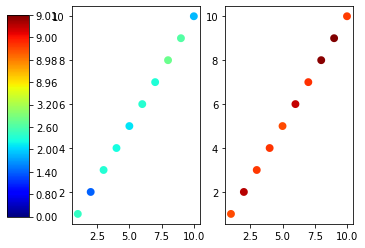

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = y = np.linspace(1, 10, 10)

t1mean, t2mean = 2, 9
sigma1, sigma2 = .3, .01
t1 = np.random.normal(t1mean, sigma1, 10)
t2 = np.random.normal(t2mean, sigma2, 10)

class nlcmap(object):
    def __init__(self, cmap, levels):
        self.cmap = cmap
        self.N = cmap.N
        self.monochrome = self.cmap.monochrome
        self.levels = np.asarray(levels, dtype='float64')
        self._x = self.levels
        self.levmax = self.levels.max()
        self.transformed_levels = np.linspace(0.0, self.levmax,
             len(self.levels))

    def __call__(self, xi, alpha=1.0, **kw):
        yi = np.interp(xi, self._x, self.transformed_levels)
        return self.cmap(yi / self.levmax, alpha)

tmax = max(t1.max(), t2.max())
#the choice of the levels depends on the data:
levels = np.concatenate((
    [0, tmax],
    np.linspace(t1mean - 4 * sigma1, t1mean + 4 * sigma1, 5),
    np.linspace(t2mean - 4 * sigma2, t2mean + 4 * sigma2, 5),
    ))

levels = levels[levels <= tmax]
levels.sort()

cmap_nonlin = nlcmap(plt.cm.jet, levels)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(x, y, edgecolors=cmap_nonlin(t1), s=15, linewidths=4)
ax2.scatter(x, y, edgecolors=cmap_nonlin(t2), s=15, linewidths=4)

fig.subplots_adjust(left=.25)
cbar_ax = fig.add_axes([0.10, 0.15, 0.05, 0.7])

#for the colorbar we map the original colormap, not the nonlinear one:
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, 
                norm=plt.Normalize(vmin=0, vmax=tmax))
sm._A = []

cbar = fig.colorbar(sm, cax=cbar_ax)
#here we are relabel the linear colorbar ticks to match the nonlinear ticks
cbar.set_ticks(cmap_nonlin.transformed_levels)
cbar.set_ticklabels(["%.2f" % lev for lev in levels])

plt.show()

In [3]:
cmap_nonlin = nlcmap(plt.cm.plasma, levels)

In [4]:
%matplotlib qt

In [7]:
levels = np.linspace(0, 1, 10)
levels = np.array(list(map(f, levels)))

fig, ax0 = plt.subplots(1, 1)
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                norm=plt.Normalize(vmin=0, vmax=tmax))
sm._A = []

cbar = fig.colorbar(sm, ax0)
#here we are relabel the linear colorbar ticks to match the nonlinear ticks
cbar.set_ticks(cmap_nonlin.transformed_levels)
cbar.set_ticklabels(["%.2f" % lev for lev in levels])

In [16]:
p = vid.femm2d(e=799, close=False)

#### Movement equation particle

In [2]:
def r_pos(t):
    return 1 - math.exp(-t) - t + 1
def r_pos_ln(t):
    return math.log(t) * t
def r_pos_wolf(t):
    return (1 - t)**0.2

In [3]:
X = np.linspace(0, 0.99, 10000)
Y = np.array(list(map(r_pos_wolf, X)))

plt.plot(X, Y)

In [4]:
# magnetic dipole moment of particle
def m_d_m_p(radius, magnetic_sus, H):
    return (4/3)*math.pi*radius**3*magnetic_sus*H

In [5]:
def K_value(m, u_0, theta):
    return m**2/(4*math.pi*u_0)*(3*math.cos(theta)**2 - 1)

In [6]:
def A_value(K, viscosity, radius):
    return (15*K/(6*math.pi*viscosity*radius))**0.2

In [7]:
def t_0_value(x_0, A):
    return (x_0/A)**5

In [8]:
radius = 5 * 10**(-7)
magnetic_sus = 1
H = 10 / 0.00034
u_0 = 4*math.pi*10**(-7)
viscosity = 0.1
theta = 30*math.pi/180
x_0 = 2 * 10**(-6)

In [9]:
m = m_d_m_p(radius, magnetic_sus, H)
K = K_value(m, u_0, theta)
A = A_value(K, viscosity, radius)
t_0 = t_0_value(x_0, A)

In [10]:
def x_equ(t):
    return A*(t_0 - t)**0.2

In [11]:
X = np.linspace(0, t_0, 10000)
Y = np.array(list(map(x_equ, X)))

plt.plot(X, Y)
plt.grid()

##### magnetic energy approach

In [3]:
# 2mm X 350um X 100 um

u_0 = 4*math.pi*10**(-7)
viscosity = 0.1

diff_perm = u_0 * 3 * 2*10**(-3) * 1*10**(-4) / (3.5*10**(-4))
E_mag = 10**2/2*(diff_perm)

In [4]:
con = 0.4
r = 0.5*10**(-6)

N = 2000*350*100*0.008
epsilon = r*((0.74/0.01)**(1/3)-1)

In [5]:
tau = 12*math.pi*epsilon**2*viscosity*r*N/E_mag

In [6]:
tau

2.5061922375811353e-05

In [34]:
def equ_lin_r(t):
    fi = 0.4
    return fi/(1-t)+1

In [35]:
X = np.linspace(0.66, 0.95, 1000)
Y = np.array(list(map(equ_lin_r, X)))

In [40]:
def approx_equ_lin_r(t):
    fi = 0.4
    rmin = 0.8
    rmax = 0.925
    fac = 14
    a = fi/(1-rmin)+1-fi*rmin**fac*(rmax-rmin)/((rmax**fac-rmin**fac)*(1-rmin)*(1-rmax))
    b = fi*(rmax-rmin)/((rmax**fac-rmin**fac)*(1-rmin)*(1-rmax))
    return a + b*t**fac

In [41]:
Y_approx = np.array(list(map(approx_equ_lin_r, X)))

plt.plot(X, Y)
plt.plot(X, Y_approx)

In [68]:
def equ_lin_r_H(H):
    fi = 0.4
    rmax = 0.925
    Hmax = 50000
    fac = 1/4
    r = (fi+2)/3 + H**fac*(3*rmax-fi-2)/(3*Hmax**fac)
    return fi/(1-r)+1

In [73]:
def equ_r(H):
    fi = 0.4
    rmax = 0.925
    Hmax = 50000
    fac = 1/4
    r = (fi+2)/3 + H**fac*(3*rmax-fi-2)/(3*Hmax**fac)
    return r

In [151]:
def comp_P05(H):
    return 3 + 3.1*H**0.5/50000**0.5

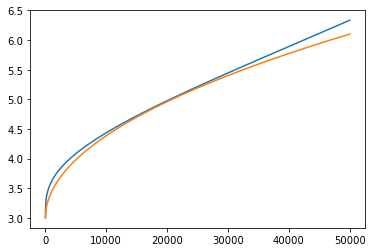

In [152]:
X = np.linspace(0, 50000, 1000)
Y = np.array(list(map(equ_lin_r_H, X)))
Y_comp = np.array(list(map(comp_P05, X)))

plt.plot(X, Y)
plt.plot(X, Y_comp)

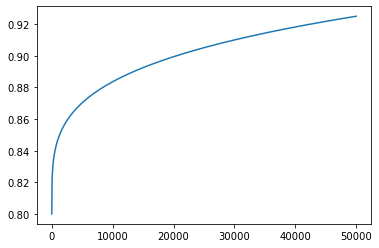

In [153]:
X = np.linspace(0, 50000, 1000)
Y_r = np.array(list(map(equ_r, X)))

plt.plot(X, Y_r)

In [180]:
def equ_r_corr(H):
    fi = 0.4
    rmax = 0.925
    Hmax = 100000
    fac = 1/2
    corr = 2.12
    r = (fi+2)/3 + corr*H**fac*(3*rmax-fi-2)/(3*Hmax**fac) - corr*fac*H*Hmax**(fac-1)*(3*rmax-fi-2)/(3*Hmax**fac)
    return fi/(1-r)+1

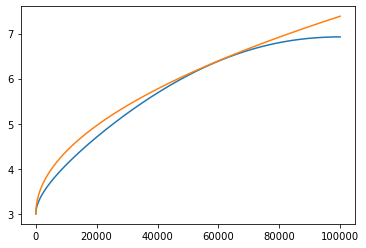

In [181]:
X = np.linspace(0, 100000, 1000)
Y = np.array(list(map(equ_r_corr, X)))
Y_comp = np.array(list(map(comp_P05, X)))

plt.plot(X, Y)
plt.plot(X, Y_comp)

In [199]:
def equ_r_exp(H):
    fi = 0.4
    fimax = 0.775
    H0 = 16000
    r = (fi+2)/3 + (fimax-fi)/3 - (fimax-fi)/3*math.exp(-H/H0)
    return fi/(1-r)+1

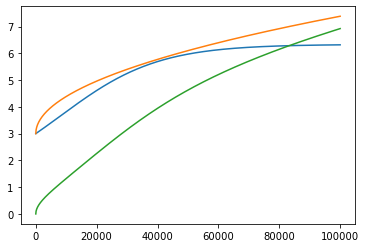

In [203]:
X = np.linspace(0, 100000, 1000)
Y = np.array(list(map(equ_r_exp, X)))
Y_comp = np.array(list(map(comp_P05, X)))
Y_mult = Y * (Y_comp-3) / 4

plt.plot(X, Y)
plt.plot(X, Y_comp)
plt.plot(X, Y_mult)

In [35]:
def gauss(x):
    return math.exp(-x**2)

def approx_integ_gauss(x):
    return 0.89 * (x/0.89) / (1 + x/0.89)
    return 0.89 * (x/0.89 + x**2 + x**3) / (1 + x/0.89 + x**2 + x**3)

X = np.linspace(0, 10, 1001)
Y = np.array(list(map(gauss, X)))

X_integ = np.linspace(0, 10.01, 1002)
Y_integ = np.array([sum(Y[:i])/100 for i in range(1002)])
Y_integ_approx = np.array(list(map(approx_integ_gauss, X_integ)))
Y_approx = np.array([100*(Y_integ_approx[i+1]-Y_integ_approx[i]) for i in range(1001)])

plt.plot(X, Y, label="gauss")
plt.plot(X, Y_approx, label="gauss_approx")

plt.plot(X_integ, Y_integ, label="gauss_integ")
plt.plot(X_integ, Y_integ_approx, label="gauss_integ_approx")

plt.grid()
plt.legend()

In [29]:
%matplotlib qt

1.3333333333333333